## Hello

```python
print("Hello!!")

```
# markdown 寫筆記專用語法

In [15]:
print("Hello!!")

Hello!!


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 載入 Boston 房價資料集

In [17]:
with open('housing.data', encoding='utf8') as f:
    data = f.readlines()
all_fields = []
for line in data:
    line2 = line[1:].replace('   ', ' ').replace('  ', ' ')
    fields = []
    for item in line2.split(' '):
        fields.append(float(item.strip()))
        if len(fields) == 14:
            all_fields.append(fields)
df = pd.DataFrame(all_fields)
df.columns = 'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV'.split(',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
## 2. 資料清理、資料探索與分析
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<Axes: ylabel='Count'>

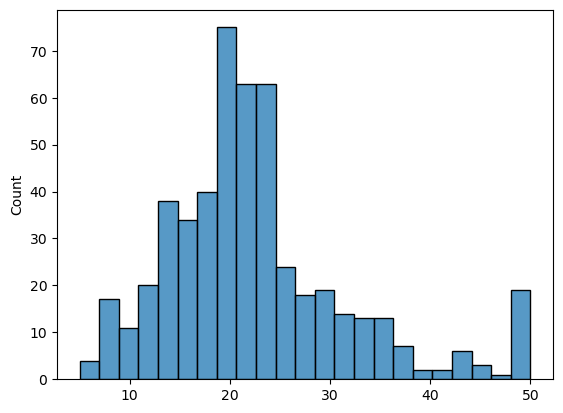

In [19]:
# 直方圖
import seaborn as sns

X, y = df.drop('MEDV', axis=1).values, df.MEDV.values
sns.histplot(x=y)

## 4. 資料分割

In [29]:
# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 特徵縮放

In [30]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## 6. 模型訓練

In [32]:
model.fit(X_train_std, y_train)

LinearRegression()

## 7. 模型評分

In [33]:
y_pred = model.predict(X_test_std)

In [34]:
print(f'MSE = {mean_squared_error(y_test, y_pred)}') 
print(f'MAE = {mean_absolute_error(y_test, y_pred)}') 

MSE = 22.9867572526049
MAE = 3.3688389591015486
